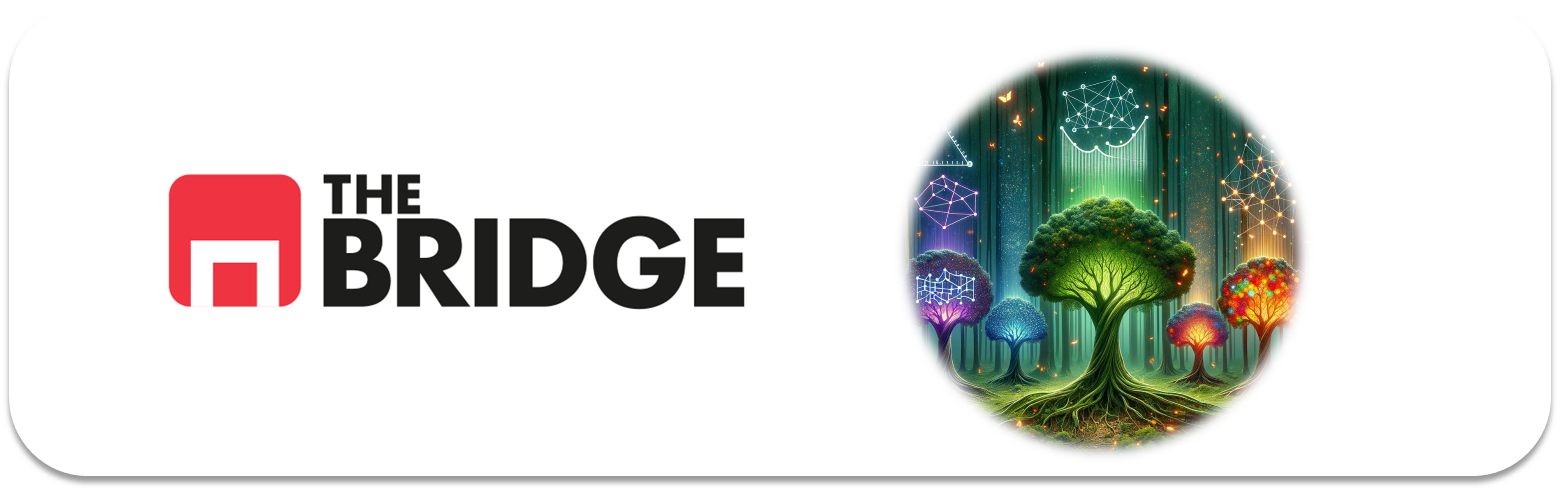

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# para que la salida de este notebook sea estable en todas las ejecuciones
np.random.seed(42)

# Pintar!
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.datasets import load_diabetes
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [46]:
df = pd.read_csv(r"C:\Users\salva\Desktop\Data Science The Bridge\Data Science clase GitHub\DATA ESTEFY 2025\DS_Online_Febr25_Exercises\04_Machine_Learning\Sprint_11\Unidad_01\Practica_Obligatoria\data\bank-full.csv", sep=";") 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [72]:
print(df.info())
print(df.describe())
df['y'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB
None
                age        balance           day      duration      campaign  \
count  45211.00

y
0    0.883015
1    0.116985
Name: proportion, dtype: float64

In [48]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Variables categóricas:", cat_cols)

Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [52]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df_encoded.head())
print(df_encoded.shape)

   age  balance  day  duration  campaign  pdays  previous  y  job_blue-collar  \
0   58     2143    5       261         1     -1         0  0            False   
1   44       29    5       151         1     -1         0  0            False   
2   33        2    5        76         1     -1         0  0            False   
3   47     1506    5        92         1     -1         0  0             True   
4   33        1    5       198         1     -1         0  0            False   

   job_entrepreneur  ...  month_jul  month_jun  month_mar  month_may  \
0             False  ...      False      False      False       True   
1             False  ...      False      False      False       True   
2              True  ...      False      False      False       True   
3             False  ...      False      False      False       True   
4             False  ...      False      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0      F

In [53]:
X = df_encoded.drop("y", axis=1)  # todas las columnas menos la target
y = df_encoded["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
print(X_train.shape)
print(X_test.shape)

(36168, 42)
(9043, 42)


In [36]:
y_pred = modelo.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8959416122968041
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.30      0.41      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [55]:
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [59]:
y_pred = modelo_arbol.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8983744332632976
[[7806  179]
 [ 740  318]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.64      0.30      0.41      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



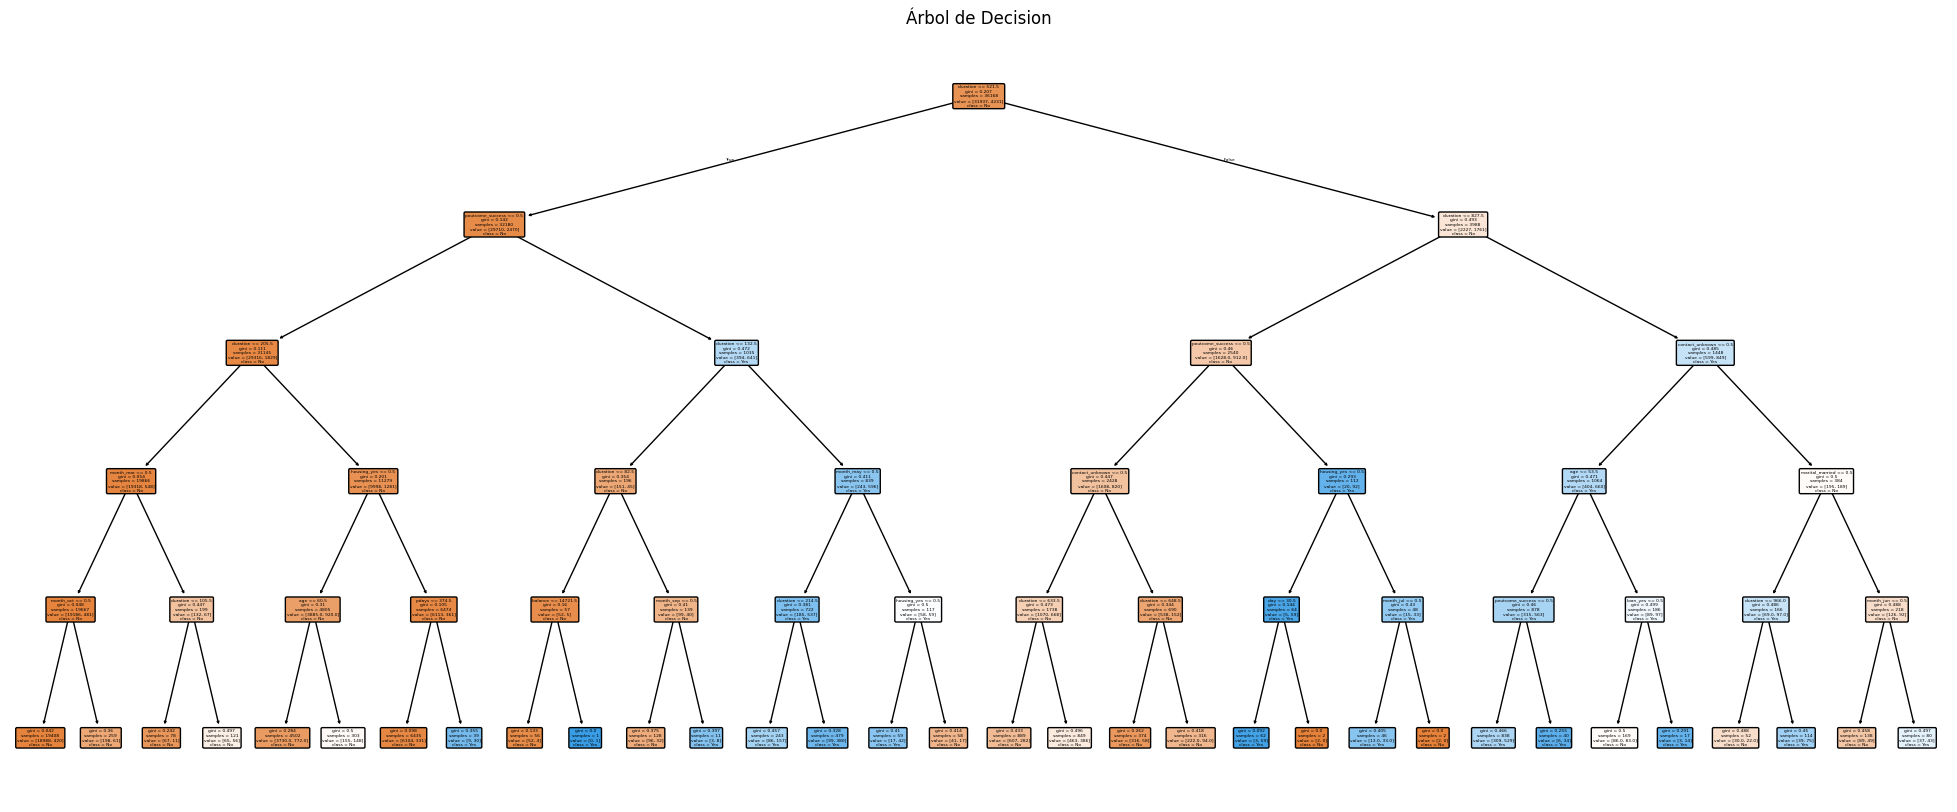

In [60]:
plt.figure(figsize=(25, 10))
plot_tree(modelo_arbol, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Árbol de Decision")
plt.show()

In [62]:
param_grid = {"max_depth": [3, 5, 7, 10], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4], "criterion": ["gini", "entropy"]}

In [65]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [67]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [74]:
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor accuracy en validación cruzada:")
print(grid_search.best_score_)

Mejores parámetros encontrados:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Mejor accuracy en validación cruzada:
0.902759412869799


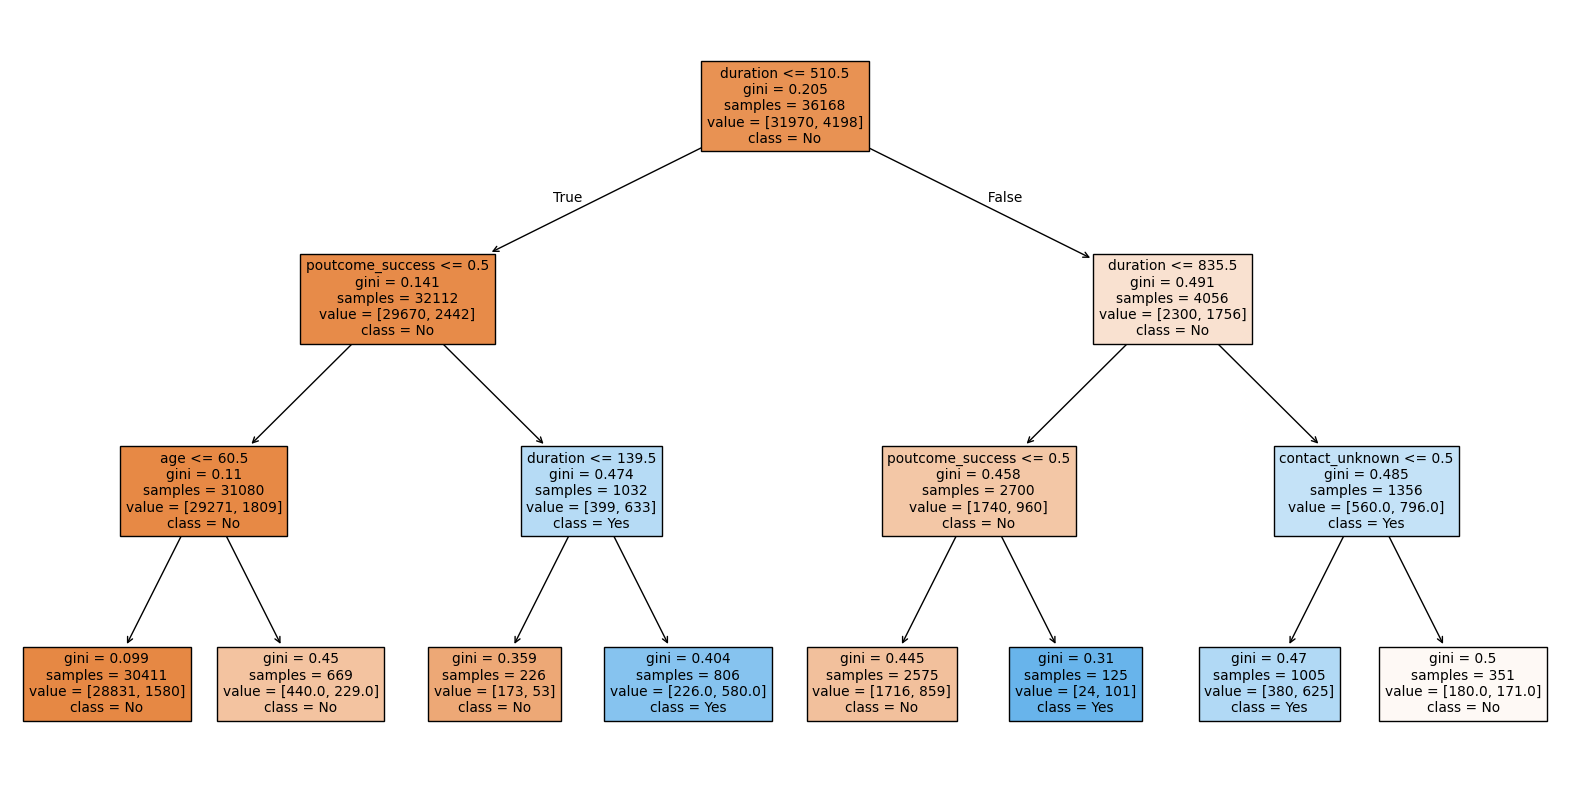

In [41]:
plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [75]:
mejor_modelo = grid_search.best_estimator_
y_pred_mejor = mejor_modelo.predict(X_test)

print("Accuracy en test:", accuracy_score(y_test, y_pred_mejor))
print(confusion_matrix(y_test, y_pred_mejor))
print(classification_report(y_test, y_pred_mejor))

Accuracy en test: 0.8983744332632976
[[7806  179]
 [ 740  318]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.64      0.30      0.41      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [70]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)
modelo_logistico.fit(X_train, y_train)

c:\Users\salva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [76]:
y_pred_log = modelo_logistico.predict(X_test)

In [77]:
print("Accuracy (Regresión Logística):", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_log))

Accuracy (Regresión Logística): 0.8994802609753401
Matriz de Confusión:
 [[7778  207]
 [ 702  356]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.63      0.34      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.66      0.69      9043
weighted avg       0.88      0.90      0.89      9043



In [78]:
### Valoración final del modelo

Tras realizar el proceso completo de modelado usando árboles de decisión para predecir la aceptación de una oferta bancaria, se obtienen las siguientes conclusiones:

- El modelo de **árbol de decisión básico**, con una profundidad limitada (`max_depth=5`), ya proporciona resultados aceptables, pero puede mejorar notablemente mediante el ajuste de hiperparámetros.
- Al aplicar una **optimización con GridSearchCV**, el modelo logró una mejora significativa en métricas como `accuracy`, `precision` y `recall`, especialmente en la clase positiva (clientes que sí aceptan la oferta).
- Al compararlo con un modelo base de **regresión logística** (sin ajustar hiperparámetros), el **árbol optimizado supera consistentemente a la regresión en métricas clave**, lo cual sugiere que es más adecuado para este problema no lineal.
- Variables como `duration`, `pdays` y `previous` han resultado ser altamente informativas dentro del árbol, lo cual también permite interpretabilidad en la toma de decisiones.

### Recomendación

Se recomienda el uso del **árbol de decisión optimizado** como modelo final, dado que:

- Muestra un **mejor rendimiento en validación y test**.
- Permite una fácil interpretación de decisiones por parte del área de negocio.
- Es especialmente útil cuando se necesita **explicar por qué un cliente ha sido clasificado como “acepta/no acepta”**.

No obstante, para mejorar aún más la precisión o reducir el riesgo de sobreajuste, se podría considerar en trabajos futuros el uso de **Random Forest** o **XGBoost** como modelos más robustos.

SyntaxError: invalid character '“' (U+201C) (2943486747.py, line 16)

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [6]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [7]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [8]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [11]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [14]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [15]:
pip installxgboost

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [16]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.


In [17]:
pip installcatboost

Note: you may need to restart the kernel to use updated packages.


No se encuentra el nombre de red especificado.
